<a href="https://colab.research.google.com/github/megha07d/HandWritten-Digit-Recognition/blob/main/RecognizeDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognizer**

### **Imports**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## **Using Keras API to download dataset**

In [ ]:
(train_pixels, train_labels), (test_pixels, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


### **Data we are dealing with**

In [ ]:
type(train_pixels)
print(f'Shape of data set is : {train_pixels.shape} - array of 60k matrices')
print(f'Shape of each entry is : {train_pixels[0].shape} - a 28 x 28 matrix')
print(f'Shape of each column in 28 x 28 matrix is : {train_pixels[0,0].shape}')
print(f'Looking at one of the pixels loc@[0,10,20]: {train_pixels[0,10,20]}')

# range of pixels
np.amax(train_pixels[3])
np.amax(train_pixels[3,19])


Shape of data set is : (60000, 28, 28) - array of 60k matrices
Shape of each entry is : (28, 28) - a 28 x 28 matrix
Shape of each column in 28 x 28 matrix is : (28,)
Looking at one of the pixels loc@[0,10,20]: 0


253

## **Looking at images**

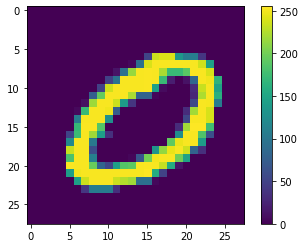

In [ ]:
plt.figure()
plt.imshow(train_pixels[57395])
plt.colorbar()
plt.grid(False)
plt.show()

## **Normalize pixel values**


> Pixel values range from 0 to 255 , lets normalize it to 0 to 1

> We do this because model can process smaller values better

Understanding input data 

In [ ]:
train_pixels = train_pixels/255.0
test_pixels = test_pixels/255.0

Understanding Labels data 

In [ ]:
type(train_labels)
print(f'Shape of data set is : {test_labels.shape} - array of 60k matrices')
train_labels[:10]

Shape of data set is : (10000,) - array of 60k matrices


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### **Class Labels**

In [ ]:
class_labels = [0,1,2,3,4,5,6,7,8,9]

## **Let's Build the Model**
We will use a Keras Sequential Model with three layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layers with 784 neurons
    keras.layers.Dense(128,activation='relu'),  #hidden layer with 128 neurons
    keras.layers.Dense(10,activation='softmax') #output layer with 10 neurons
])

* For Input layer we used shape of '28x28' to receive the input and **Flatten** to condense it to 784 elements array
* Hidden layers after input layer consists of 128 neurons and **Dense** indicates each neuron in this layer is connected to each neuron in previous layer
* Rectify linear unit activation function used in hidden layer.
* As expected, output layer should have 10 neurons symbolising 10 labels we expect.Thsi is also a **dense** layer.
* Activation function softmax is used to represent probability density function for each class.Thus each of the 10 neurons value lies in range 0-1, signifying the chances of falling in respective class 

## **Add Loss function, Optimizer and Metrics to model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **Model Training Phase**

In [ ]:
model.fit(train_pixels,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2571 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1158 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0810 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0297 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

* Here, **epoch** specifies number of times training dataset passes through algorithm
* Each pass changes the model parameters like weights and bias

## **How good is our Model - Model Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(test_pixels,  test_labels, verbose=1) #verb = 1 shows progress bar

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


## **Predicting the untouched data**

In [ ]:
predictions = model.predict(test_pixels)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions)

[[5.4730958e-07 1.4926453e-09 6.9289297e-07 ... 9.9996167e-01
  5.9951475e-08 1.6328206e-05]
 [9.5593664e-17 2.2021247e-08 9.9999994e-01 ... 4.8796578e-23
  7.7079017e-11 6.7436449e-21]
 [7.6189902e-11 9.9960929e-01 1.5469343e-05 ... 1.0999682e-05
  3.5531458e-04 6.5031230e-07]
 ...
 [1.0533118e-18 1.0828512e-11 6.7724837e-16 ... 4.7996596e-10
  2.4129152e-09 5.7455827e-09]
 [4.7740117e-11 2.3509759e-14 1.4264211e-13 ... 3.8805351e-14
  2.5352187e-04 9.0227083e-13]
 [5.6729634e-12 7.7295957e-20 8.4087138e-15 ... 2.9028547e-19
  1.2961915e-14 6.0359928e-16]]


In [ ]:
print(len(test_pixels))
print(len(test_pixels[0]))

10000
28


## **Let's Analyze the predictions**

In [ ]:
print(f'Shape of pred_array is : {predictions.shape}')

Shape of pred_array is : (10000, 10)


* For each input image, we got a array of 10 values each representing 10 class-indices we have

## **Pick the class with highest Probability**

In [ ]:
np.argmax(predictions[46])

1

# **Let's test the model : Image VS Prediction**

Pick any sample from test data (enter 0-1000): 456


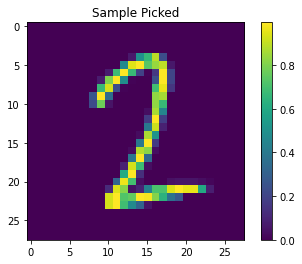



Predicted Digit is : 2


In [ ]:
def get_number():
  while True:
    num = input("Pick any sample from test data (enter 0-1000): ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")
num = get_number()

# show the image of chosen Sample
plt.figure()
plt.imshow(test_pixels[num])
plt.colorbar()
plt.grid(False)
plt.title('Sample Picked')
plt.show()

# Show the Digit prediction by model
print(f'\n\nPredicted Digit is : {np.argmax(predictions[num])}')